In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def imshow(tit, image):
    plt.title(tit)
    if image.shape == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
        

# 1.사각형 찾기(book)

> 외곽선 찾는 함수
- Canny: 외곽선인지 아닌지를 찾아주는 함수 ( 픽셀의 개념)
- countour: 폐곡선으로 된 외곽선을 찾아주는 함수? (도형의 개념)

## 1.1. 가우시안 블러로 노이즈 없애고, 외곽선 따기

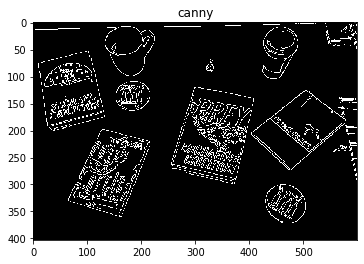

In [23]:
image = cv2.imread('./images/book.jpg',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (3,3), 0)




# 외곽선 정보만 추출해주는 함수(방향성을 따지므로, 최외곽에 대한 , 변화량만 보는 것이 아니라, 연속된 엣지도 함께 고려 )
edged =cv2.Canny(gray, 
                 threshold1 =10,   # 엣지양이 10보다 작으면 edge가 아니다.
                 threshold2 = 250)  # 250보다 edge양이 크면 무조검 edge로 보겠다
# 10~250은 edge일 수도 아닐 수도 있음. 
#-> 두 픽셀의 뺄셈 값과 함께 주변의 점들이 edge였냐 아니었냐, 연결된 엣지냐 아니냐도 보고 edge인지 아닌지를 판단
# 결과: binary값으로 나옴. 0, 255 -> edge다, edge가 아니다

imshow('canny', edged)


## 1.2. 끊어진 점 연결하기: closed 연산( MORPH 연산)

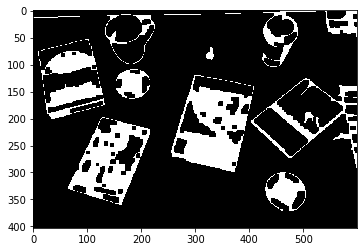

In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow('', closed)

## 1.3. contour로 외곽선 찾기

8
4
14
4
8
8
4
9


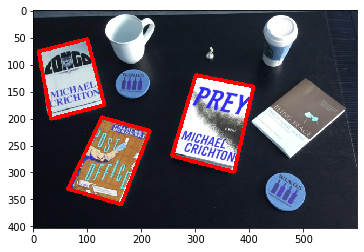

In [25]:
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total = 0

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    
    print(len(approx))
    if len(approx)==4:
        cv2.drawContours(image, [approx], -1, (255,0,0), 5)
    total +=1
    
imshow('',image)

# 2. 원 찾기(코인 찾기)

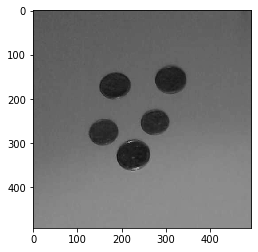

In [55]:
img = cv2.imread('./images/coin.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('', img)

## 2.1. blur처리

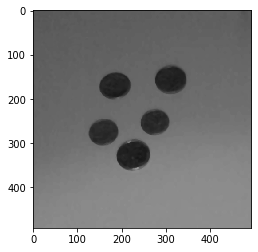

In [56]:
img_blur = cv2.medianBlur(img, 5)


imshow('', img_blur)

## 2.2. 원 찾는 함수

- contour로 찾는 것은 255인 픽셀을 검사하면서 외곽선을 따기
- houghCircles: 각 지점별로 원인지 아닌지 검사하면서 찾는 것

In [57]:
circles = cv2.HoughCircles(image=gray, 
                           method= cv2.HOUGH_GRADIENT,  # 1차 미분값을 이용헤서 edge여부 판단
                           dp=1,   # 주로 1. 2를 주면 결과 영상이 반으로 줄어듦. resolution 값. 역수로 줄어듦.
                           minDist= 20, # 검출된 원 간의 min 거리, 노이즈들을 인식하지 않도록
                           param1=100,
                           param2=30, 
                           minRadius=10, 
                           maxRadius=50)
# 내부적으로 Canny를 사용해서 edge를 찾음.
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨, 
# 이 값보다 작으면 edge로 처리하지 않고, 이 값보다 크면 edge처리. 
# edge 판단의 threshold값
# 작을 수록 많은 원이 검출됨

# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# 원인지 아닌지를 계산하는 점수
# canay를 이용하여 검출된 점을 이용해서 원인지 아닌지를 판단하는 점수
# 원이라고 투표한 사람의 수 -> 확률의 개념으로.......?


# 중심점과 반지름 return
# cv2에서 draw하기 위해서 좌표값으로 하기 위해 int값으로 변환
circles = np.uint16(np.around(circles))
circles


array([[[222, 328,  33],
        [308, 156,  33],
        [272, 254,  30]]], dtype=uint16)

In [58]:
def detect_weiqi(img):
    txt = 'black'
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100,255,cv2.THRESH_BINARY)
    
    c  = Counter(list(threshold.flatten()))
    print

## 2.3. 찾은 원 그리기

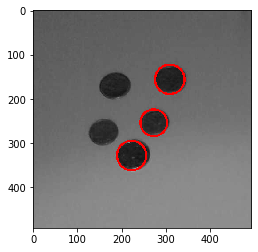

In [59]:
circle_draw = img.copy()
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
for i in circles[0,:]:
    x, y, r = i
    
    cv2.circle(circle_draw, (x, y), r, (255,0,0), 3)
#     crop_img = img[y-r: y + r, x -r: x + r]
#     txt, threshold = detect_weiqi(crop_img) 

imshow('', circle_draw)

In [ ]:
# 2. 원 찾기(바둑돌 찾기)

img = cv2.imread('./images/stone.png', 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('', img)

## 2.1. blur처리

img_blur = cv2.medianBlur(image, 5)


imshow('', img_blur)

## 2.2. 원 찾는 함수

- contour로 찾는 것은 255인 픽셀을 검사하면서 외곽선을 따기
- houghCircles: 각 지점별로 원인지 아닌지 검사하면서 찾는 것

circles = cv2.HoughCircles(image=gray, 
                           method= cv2.HOUGH_GRADIENT,  # 1차 미분값을 이용헤서 edge여부 판단
                           dp=1,   # 주로 1. 2를 주면 결과 영상이 반으로 줄어듦. resolution 값. 역수로 줄어듦.
                           minDist= 20, # 검출된 원 간의 min 거리, 노이즈들을 인식하지 않도록
                           param1=100,
                           param2=30, 
                           minRadius=10, 
                           maxRadius=50)
# 내부적으로 Canny를 사용해서 edge를 찾음.
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨, 
# 이 값보다 작으면 edge로 처리하지 않고, 이 값보다 크면 edge처리. 
# edge 판단의 threshold값
# 작을 수록 많은 원이 검출됨

# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# 원인지 아닌지를 계산하는 점수
# canay를 이용하여 검출된 점을 이용해서 원인지 아닌지를 판단하는 점수
# 원이라고 투표한 사람의 수 -> 확률의 개념으로.......?


# 중심점과 반지름 return
# cv2에서 draw하기 위해서 좌표값으로 하기 위해 int값으로 변환
circles = np.uint16(np.around(circles))
circles


def detect_weiqi(img):
    txt = 'black'
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100,255,cv2.THRESH_BINARY)
    
    c  = Counter(list(threshold.flatten()))
    print

## 2.3. 찾은 원 그리기

circle_draw = img.copy()
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
for i in circles[0,:]:
    x, y, r = i
    
    cv2.circle(circle_draw, (x, y), r, (255,0,0), 3)
#     crop_img = img[y-r: y + r, x -r: x + r]
#     txt, threshold = detect_weiqi(crop_img) 

imshow('', circle_draw)



# 3. 원 찾기(자전거 찾기)

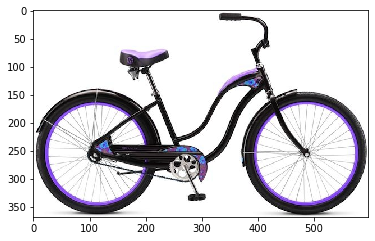

In [67]:
img = cv2.imread('./images/bike.jpg', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('', img)

## 2.1. blur처리

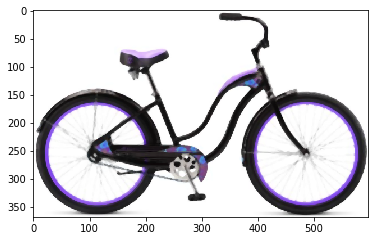

In [81]:
img_blur = cv2.medianBlur(img, 5)


imshow('', img_blur)

## 2.2. 원 찾는 함수: cv2.HoughCircles


- contour로 찾는 것은 255인 픽셀을 검사하면서 외곽선을 따기
- houghCircles: 각 지점별로 원인지 아닌지 검사하면서 찾는 것

In [82]:
circles = cv2.HoughCircles(image=gray, 
                           method= cv2.HOUGH_GRADIENT,  # 1차 미분값을 이용헤서 edge여부 판단
                           dp=1,   # 주로 1. 2를 주면 결과 영상이 반으로 줄어듦. resolution 값. 역수로 줄어듦.
                           minDist= 100, # 검출된 원 간의 min 거리, 노이즈들을 인식하지 않도록
                           param1=100,
                           param2=100, 
                           minRadius=50, 
                           maxRadius=100)
# 내부적으로 Canny를 사용해서 edge를 찾음.
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨, 
# 이 값보다 작으면 edge로 처리하지 않고, 이 값보다 크면 edge처리. 
# edge 판단의 threshold값
# 작을 수록 많은 원이 검출됨

# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# 원인지 아닌지를 계산하는 점수
# 후보자를 만들어놓고 원인지 아닌지 검사
# canay를 이용하여 검출된 점을 이용해서 원인지 아닌지를 판단하는 점수
# 원이라고 투표한 사람의 수 -> 확률의 개념으로.......?


# 중심점과 반지름 return
# cv2에서 draw하기 위해서 좌표값으로 하기 위해 int값으로 변환
circles = np.uint16(np.around(circles))
circles


array([[[486, 256,  93],
        [114, 254,  86]]], dtype=uint16)

## 2.3. 찾은 원 그리기

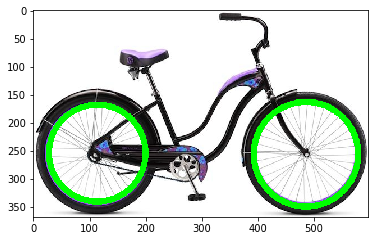

In [83]:
circle_draw = img.copy()
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
for i in circles[0,:]:
    x, y, r = i
    
    cv2.circle(circle_draw, (x, y), r, (0,255,0), 10)
#     crop_img = img[y-r: y + r, x -r: x + r]
#     txt, threshold = detect_weiqi(crop_img) 

imshow('', circle_draw)

# 4. 원 찾기(바둑돌 찾기)

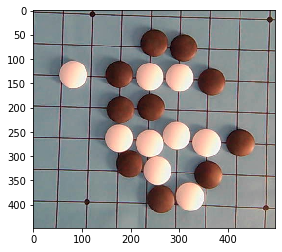

In [84]:
img = cv2.imread('./images/stone.png', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('', img)

## 2.1. blur처리

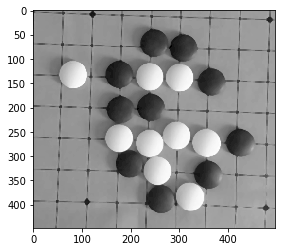

In [85]:
img_blur = cv2.medianBlur(image, 5)


imshow('', img_blur)

## 2.2. 원 찾는 함수: cv2.HoughCircles


- contour로 찾는 것은 255인 픽셀을 검사하면서 외곽선을 따기
- houghCircles: 각 지점별로 원인지 아닌지 검사하면서 찾는 것

In [86]:
circles = cv2.HoughCircles(image=gray, 
                           method= cv2.HOUGH_GRADIENT,  # 1차 미분값을 이용헤서 edge여부 판단
                           dp=1,   # 주로 1. 2를 주면 결과 영상이 반으로 줄어듦. resolution 값. 역수로 줄어듦.
                           minDist= 20, # 검출된 원 간의 min 거리, 노이즈들을 인식하지 않도록
                           param1=100,
                           param2=30, 
                           minRadius=10, 
                           maxRadius=50)
# 내부적으로 Canny를 사용해서 edge를 찾음.
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨, 
# 이 값보다 작으면 edge로 처리하지 않고, 이 값보다 크면 edge처리. 
# edge 판단의 threshold값
# 작을 수록 많은 원이 검출됨

# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# 원인지 아닌지를 계산하는 점수
# 후보자를 만들어놓고 원인지 아닌지 검사
# canay를 이용하여 검출된 점을 이용해서 원인지 아닌지를 판단하는 점수
# 원이라고 투표한 사람의 수 -> 확률의 개념으로.......?


# 중심점과 반지름 return
# cv2에서 draw하기 위해서 좌표값으로 하기 위해 int값으로 변환
circles = np.uint16(np.around(circles))
circles


array([[[302, 138,  28],
        [ 82, 132,  28],
        [294, 258,  29],
        [176, 262,  29],
        [256, 330,  28],
        [240, 138,  28],
        [240, 272,  29],
        [358, 272,  29],
        [250,  68,  28],
        [324, 384,  29],
        [426, 272,  28],
        [176, 132,  27],
        [264, 386,  32],
        [242, 200,  29],
        [366, 146,  27],
        [308,  78,  27]]], dtype=uint16)

In [87]:
def detect_weiqi(img):
    txt = 'black'
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100,255,cv2.THRESH_BINARY)
    
    c  = Counter(list(threshold.flatten()))
    print

## 2.3. 찾은 원 그리기

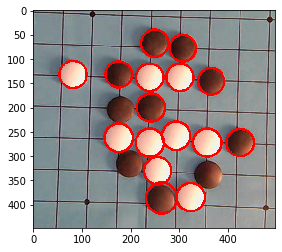

In [88]:
circle_draw = img.copy()
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
for i in circles[0,:]:
    x, y, r = i
    
    cv2.circle(circle_draw, (x, y), r, (255,0,0), 3)
#     crop_img = img[y-r: y + r, x -r: x + r]
#     txt, threshold = detect_weiqi(crop_img) 

imshow('', circle_draw)

# 5. 바둑돌 색 검출

In [94]:
from collections import Counter
# 빈도수 세기

In [98]:
a = np.array([1,2,3,4,5,6,1,2,3,4,5,1,2,1,1,1,])
a_count =Counter(a)

In [101]:
a_count.most_common()

# 빈도수가 많은 것 순으로 정렬이 되어있음.

[(1, 6), (2, 3), (3, 2), (4, 2), (5, 2), (6, 1)]

In [113]:
# crop된 이미지를 binary해서 가장 빈도수가 높은 바둑돌로 색 판단
def detect_weiqi(img):
    # defalut = biack
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # binary
    ret, threshold = cv2.threshold(gray, 100,255,cv2.THRESH_BINARY)
    
    c = Counter(list(threshold.flatten()))
    print(c.most_common())

    # 가장 많은 픽셀을 기준으로 판단
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

[(255, 3054), (0, 82)]
[(255, 3013), (0, 123)]
[(255, 3263), (0, 101)]
[(255, 3060), (0, 304)]
[(255, 2956), (0, 180)]
[(255, 3009), (0, 127)]
[(255, 3052), (0, 312)]
[(255, 3297), (0, 67)]
[(0, 2641), (255, 495)]
[(255, 3161), (0, 203)]
[(0, 2396), (255, 740)]
[(0, 2533), (255, 383)]
[(0, 3049), (255, 1047)]
[(0, 2650), (255, 714)]
[(0, 2399), (255, 517)]
[(0, 2517), (255, 399)]


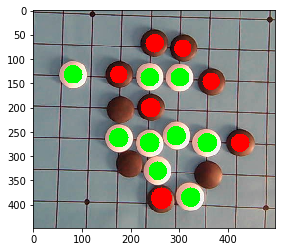

In [112]:
color_img = img.copy()
for i in circles[0, :]:
    x, y, r = i
    
    # 바둑돌만큼 이미지를 자르기
    crop_img = img[y - r:y + r, x - r:x + r]    
    
    # 바둑돌마다 txt, threshold를 return
    txt, threshold = detect_weiqi(crop_img)
    
    # 실제 바둑돌보다 작게 그리기 위해 반지름 조절
    if txt == 'black' :  
        cv2.circle(color_img, (i[0], i[1]),int(i[2]*0.7), (255, 0, 0), -1)
    else :
        cv2.circle(color_img, (i[0], i[1]), int(i[2]*0.7), (0, 255, 0), -1)            


imshow("", color_img)

# 6. eyes 검출


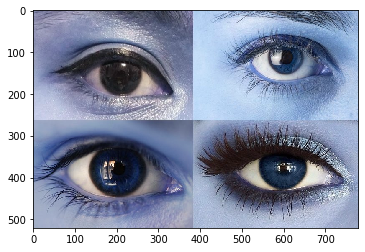

In [148]:
img = cv2.imread('./images/eyes.jpg', 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('', img)

## 2.1. blur처리

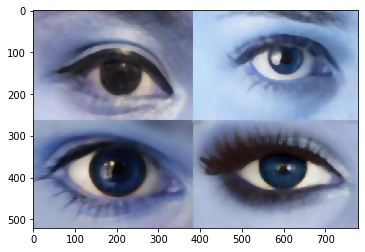

In [144]:
img_blur = cv2.medianBlur(img, 11)


imshow('', img_blur)

In [145]:
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)


## 2.2. 원 찾는 함수: cv2.HoughCircles


- contour로 찾는 것은 255인 픽셀을 검사하면서 외곽선을 따기
- houghCircles: 각 지점별로 원인지 아닌지 검사하면서 찾는 것

In [146]:
circles = cv2.HoughCircles(image=gray, 
                           method= cv2.HOUGH_GRADIENT,  # 1차 미분값을 이용헤서 edge여부 판단
                           dp=1,   # 주로 1. 2를 주면 결과 영상이 반으로 줄어듦. resolution 값. 역수로 줄어듦.
                           minDist= 20, # 검출된 원 간의 min 거리, 노이즈들을 인식하지 않도록
                           param1=100,
                           param2=30, 
                           minRadius=10, 
                           maxRadius=50)
# 내부적으로 Canny를 사용해서 edge를 찾음.
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨, 
# 이 값보다 작으면 edge로 처리하지 않고, 이 값보다 크면 edge처리. 
# edge 판단의 threshold값
# 작을 수록 많은 원이 검출됨

# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
# 원인지 아닌지를 계산하는 점수
# 후보자를 만들어놓고 원인지 아닌지 검사
# canay를 이용하여 검출된 점을 이용해서 원인지 아닌지를 판단하는 점수
# 원이라고 투표한 사람의 수 -> 확률의 개념으로.......?


# 중심점과 반지름 return
# cv2에서 draw하기 위해서 좌표값으로 하기 위해 int값으로 변환
circles = np.uint16(np.around(circles))
circles


array([[[604, 114,  41],
        [112, 388,  28]]], dtype=uint16)

## 2.3. 찾은 원 그리기

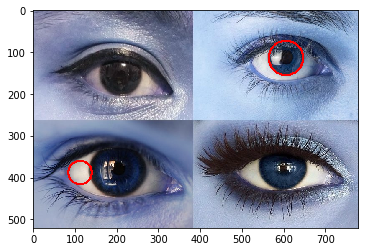

In [147]:
circle_draw = img.copy()
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
for i in circles[0,:]:
    x, y, r = i
    
    cv2.circle(circle_draw, (x, y), r, (255,0,0), 3)
#     crop_img = img[y-r: y + r, x -r: x + r]
#     txt, threshold = detect_weiqi(crop_img) 

imshow('', circle_draw)